Combine the intermediate files of the telescope, camera and atmosphere.

In [1]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rootDir = '../intermediateFiles/components'
telThroughputFile = os.path.join(rootDir, 'telThroughput.dat')
uCamThroughputFile = os.path.join(rootDir, 'uCamThroughput.dat')
gCamThroughputFile = os.path.join(rootDir, 'gCamThroughput.dat')
rCamThroughputFile = os.path.join(rootDir, 'rCamThroughput.dat')
iCamThroughputFile = os.path.join(rootDir, 'iCamThroughput.dat')
zCamThroughputFile = os.path.join(rootDir, 'zCamThroughput.dat')
yCamThroughputFile = os.path.join(rootDir, 'yCamThroughput.dat')
atm12File = '../siteProperties/pachonModtranAtm_12.dat'
fig4PlotFile = '../plots/fig4.png'

In [3]:
telThru = np.loadtxt(telThroughputFile)
uCamThru = np.loadtxt(uCamThroughputFile)
gCamThru = np.loadtxt(gCamThroughputFile)
rCamThru = np.loadtxt(rCamThroughputFile)
iCamThru = np.loadtxt(iCamThroughputFile)
zCamThru = np.loadtxt(zCamThroughputFile)
yCamThru = np.loadtxt(yCamThroughputFile)
atm12 = np.loadtxt(atm12File)

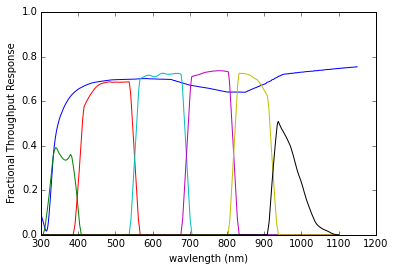

In [4]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(telThru[:,0], telThru[:,1], label='Total telescope throughput')
_ = plt.plot(uCamThru[:,0], uCamThru[:,1], label='u-band camera response')
_ = plt.plot(gCamThru[:,0], gCamThru[:,1], label='g-band camera response')
_ = plt.plot(rCamThru[:,0], rCamThru[:,1], label='r-band camera response')
_ = plt.plot(iCamThru[:,0], iCamThru[:,1], label='i-band camera response')
_ = plt.plot(zCamThru[:,0], zCamThru[:,1], label='z-band camera response')
_ = plt.plot(yCamThru[:,0], yCamThru[:,1], label='y-band camera response')
#_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [5]:
wavelen = np.arange(300, 1101, 1)
uSysThru = telThru[0:801,1] * uCamThru[:,1]
gSysThru = telThru[0:801,1] * gCamThru[:,1]
rSysThru = telThru[0:801,1] * rCamThru[:,1]
iSysThru = telThru[0:801,1] * iCamThru[:,1]
zSysThru = telThru[0:801,1] * zCamThru[:,1]
ySysThru = telThru[0:801,1] * yCamThru[:,1]

In [6]:
uLambdaCenter = (335.5+378.5)/2
gLambdaCenter = (416.5+537.0)/2
rLambdaCenter = (567.0+676.0)/2
iLambdaCenter = (706.0+803.0)/2
zLambdaCenter = (833.0+908.0)/2
yLambdaCenter = (938.5+1050.0)/2

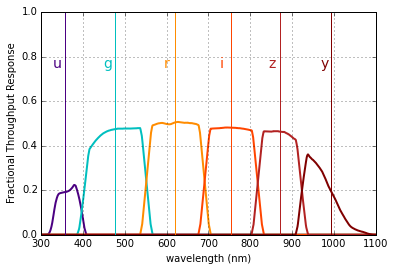

In [7]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(wavelen, uSysThru, lw=2, color='indigo', label='Total u-band system thoughput')
_ = plt.plot(wavelen, gSysThru, lw=2, color='c', label='Total g-band system thoughput')
_ = plt.plot(wavelen, rSysThru, lw=2, color='darkorange', label='Total r-band system thoughput')
_ = plt.plot(wavelen, iSysThru, lw=2, color='orangered', label='Total i-band system thoughput')
_ = plt.plot(wavelen, zSysThru, lw=2, color='firebrick', label='Total z-band system thoughput')
_ = plt.plot(wavelen, ySysThru, lw=2, color='maroon', label='Total y-band system thoughput')
_ = plt.plot([uLambdaCenter,uLambdaCenter], [0,1], color='indigo')
_ = plt.plot([gLambdaCenter,gLambdaCenter], [0,1], color='c')
_ = plt.plot([rLambdaCenter,rLambdaCenter], [0,1], color='darkorange')
_ = plt.plot([iLambdaCenter,iLambdaCenter], [0,1], color='orangered')
_ = plt.plot([zLambdaCenter,zLambdaCenter], [0,1], color='firebrick')
_ = plt.plot([yLambdaCenter,yLambdaCenter], [0,1], color='maroon')
_ = plt.text(uLambdaCenter-25, 0.75, r'u', color='indigo', fontsize=14)
_ = plt.text(gLambdaCenter-25, 0.75, r'g', color='c', fontsize=14)
_ = plt.text(rLambdaCenter-25, 0.75, r'r', color='darkorange', fontsize=14)
_ = plt.text(iLambdaCenter-25, 0.75, r'i', color='orangered', fontsize=14)
_ = plt.text(zLambdaCenter-25, 0.75, r'z', color='firebrick', fontsize=14)
_ = plt.text(yLambdaCenter-25, 0.75, r'y', color='maroon', fontsize=14)
_ = plt.xlabel('wavelength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
_ = plt.grid(True)

In [8]:
atm = np.interp(wavelen, atm12[:,0], atm12[:,1])

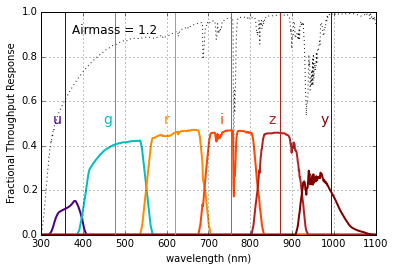

In [9]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(wavelen, atm, lw=1, linestyle=':', color='black', alpha=0.9)
_ = plt.plot(wavelen, uSysThru*atm, lw=2, color='indigo', label='Total u-band system thoughput')
_ = plt.plot(wavelen, gSysThru*atm, lw=2, color='c', label='Total g-band system thoughput')
_ = plt.plot(wavelen, rSysThru*atm, lw=2, color='darkorange', label='Total r-band system thoughput')
_ = plt.plot(wavelen, iSysThru*atm, lw=2, color='orangered', label='Total i-band system thoughput')
_ = plt.plot(wavelen, zSysThru*atm, lw=2, color='firebrick', label='Total z-band system thoughput')
_ = plt.plot(wavelen, ySysThru*atm, lw=2, color='maroon', label='Total y-band system thoughput')
_ = plt.plot([uLambdaCenter,uLambdaCenter], [0,1], color='indigo')
_ = plt.plot([gLambdaCenter,gLambdaCenter], [0,1], color='c')
_ = plt.plot([rLambdaCenter,rLambdaCenter], [0,1], color='darkorange')
_ = plt.plot([iLambdaCenter,iLambdaCenter], [0,1], color='orangered')
_ = plt.plot([zLambdaCenter,zLambdaCenter], [0,1], color='firebrick')
_ = plt.plot([yLambdaCenter,yLambdaCenter], [0,1], color='maroon')
_ = plt.text(uLambdaCenter-25, 0.5, r'u', color='indigo', fontsize=14)
_ = plt.text(gLambdaCenter-25, 0.5, r'g', color='c', fontsize=14)
_ = plt.text(rLambdaCenter-25, 0.5, r'r', color='darkorange', fontsize=14)
_ = plt.text(iLambdaCenter-25, 0.5, r'i', color='orangered', fontsize=14)
_ = plt.text(zLambdaCenter-25, 0.5, r'z', color='firebrick', fontsize=14)
_ = plt.text(yLambdaCenter-25, 0.5, r'y', color='maroon', fontsize=14)
_ = plt.text(375, 0.9, r'Airmass = 1.2', color='black', fontsize=12)
_ = plt.xlabel('wavelength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
_ = plt.grid(True)
plt.savefig(fig4PlotFile)